# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from platform import version
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


---
# Version Control

In [2]:
print(f'Python Version: {version()}')
print(f'Pandas Version: {pd.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Python Version: 10.0.19044
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2


In [3]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

---
# Data Analysis

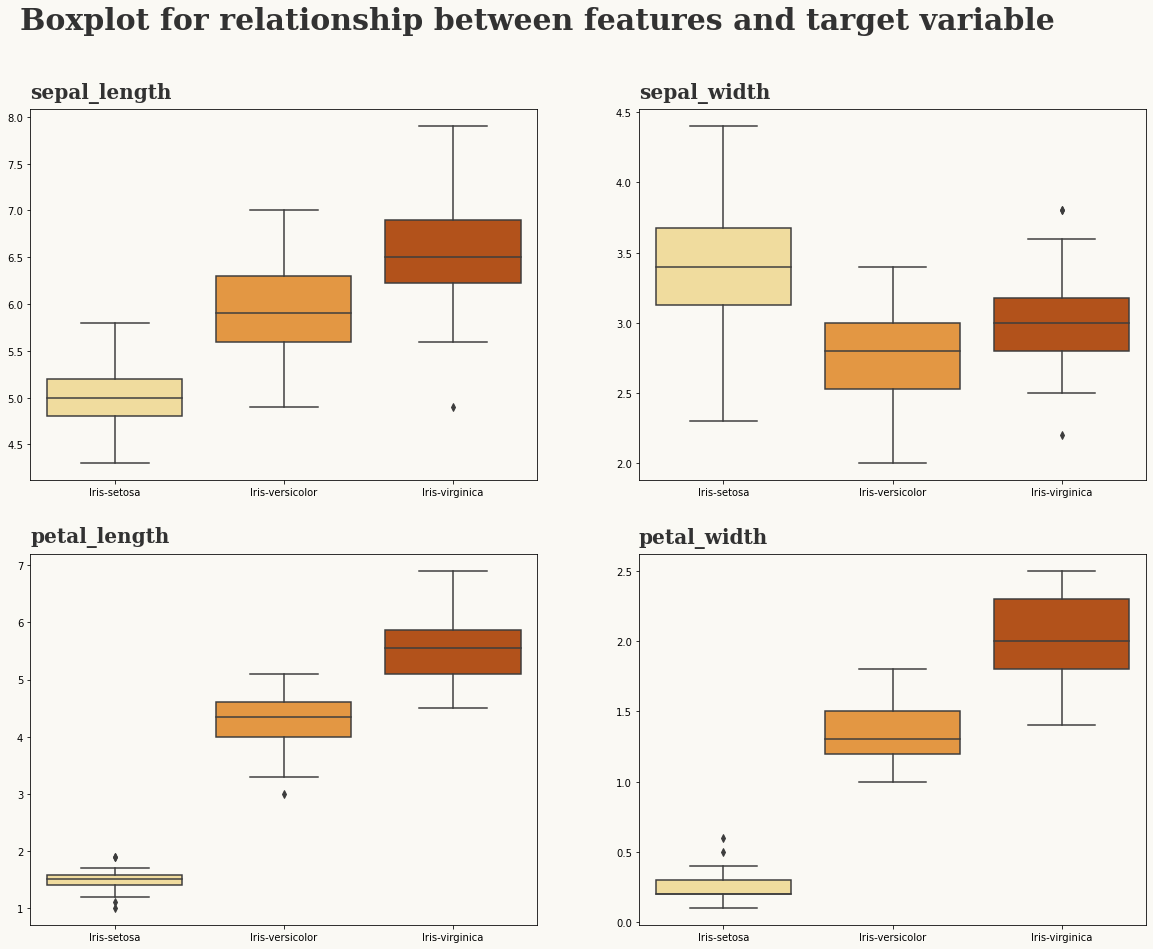

In [4]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 15))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color

axis = { 'sepal_length' : [ax0],
         'sepal_width' : [ax1],
         'petal_length' : [ax2],
         'petal_width' : [ax3]
       }

for col in axis.keys():
    sns.boxplot(data = df, x = 'species', y = col, ax = axis[col][0], palette= 'YlOrBr')
    axis[col][0].set_ylabel('')
    axis[col][0].set_xlabel('')
    
_ = ax0.text(-0.5, 8.2, 'sepal_length', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax1.text(-0.5, 4.6, 'sepal_width', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax2.text(-0.5, 7.4, 'petal_length', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')
_ = ax3.text(-0.5, 2.7, 'petal_width', fontsize = 20, fontweight='bold', fontfamily='serif', color='#323232')

_ = plt.title('Boxplot for relationship between features and target variable',fontsize=30, y = 2.4, x = -.2, fontweight='bold', fontfamily='serif', color="#323232")

## Insights:

**All the samples with petal width of below 0.6 are Iris-setosa**

**All the samples with petal width greater than 1 and less than 1.8 are Iris-Versicolor**

**All the samples with petal length greater than 1.8 are Iris-Virginica**

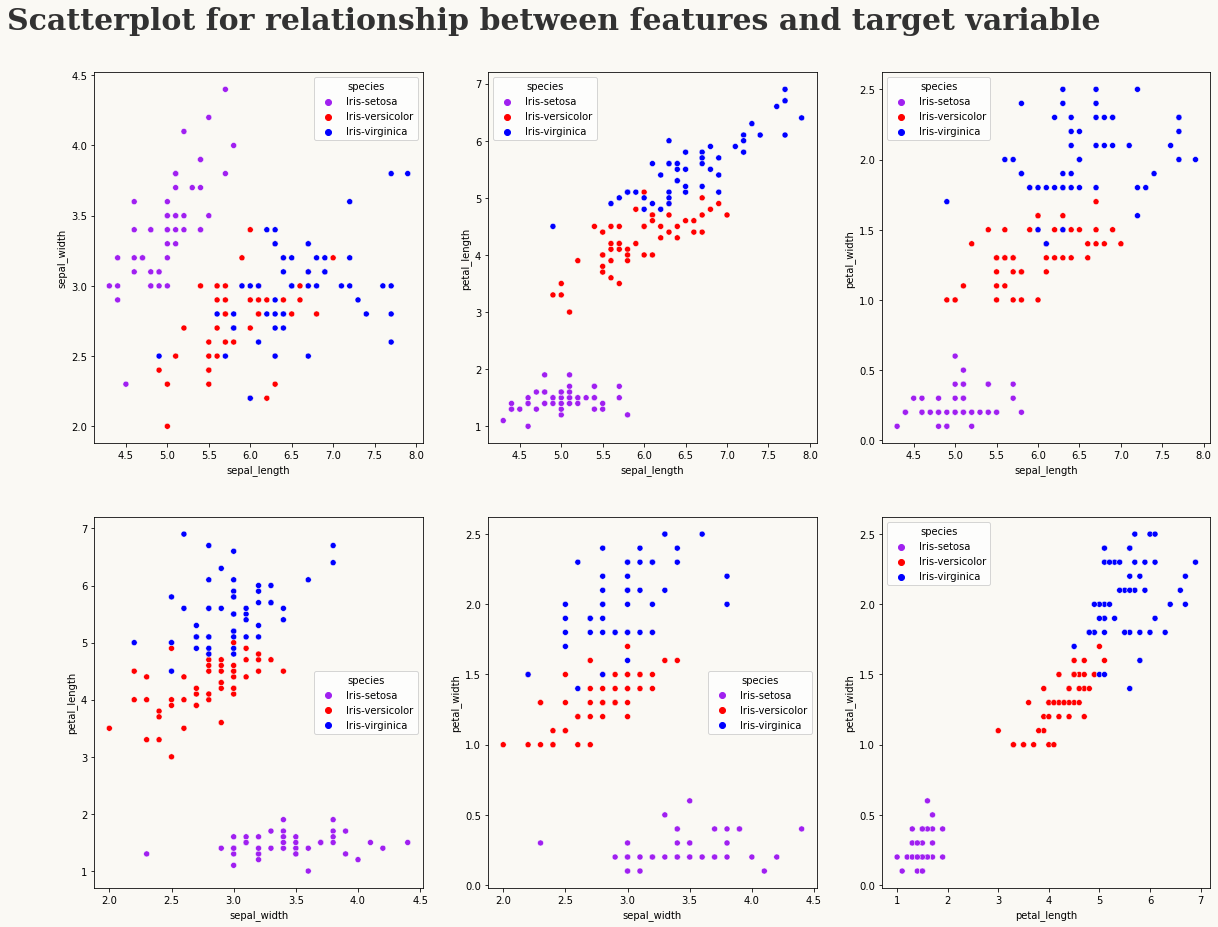

In [5]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 15))
gs = fig.add_gridspec(2, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])


background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax5.set_facecolor(background_color) # axes background color


cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
axis = [ax0, ax1, ax2, ax3, ax4, ax5]

index = 0
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        sns.scatterplot(data = df, x = cols[i], y = cols[j], palette= ['#A020F0', '#FF0000', '#0000FF'], ax = axis[index], hue = 'species')
        index+=1


_ = plt.title('Scatterplot for relationship between features and target variable',fontsize=30, y = 2.3, x = -1, fontweight='bold', fontfamily='serif', color="#323232")

## Insights:

**All the samples with petal_width greater than 1.7 are `Iris-Vriginica`.**

**Most of the samples with petal width greater than 0.9 and less atah 1.4 are `Iris-Versicolor`.**

In [6]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    '''
    This function takes sepal_length, sepal_width, petal_length, petal_width as an input and returns the type of the species.
    
    -------------
    Parameters:
    sepal_length
    sepal_width
    petal_length
    '''
    if petal_width < 0.7:
        return 'Iris-setosa'
    
    elif petal_width >= 0.9 and petal_width < 1.4:
        return 'Iris-versicolor'
    
    elif petal_width > 1.7:
        return 'Iris-virginica'
    
    return 'Iris-versicolor'

In [7]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96
